In [ ]:
# Code originally by https://github.com/maxjcohen
# My contribution is refine, fix errors and to attempt symbolic representation

In [1]:
import datetime
import os

import sys

sys.path.append('C:/Users/rohan/Dissertation/transformer-master - Copy/transformer-master')
sys.path.append('C:/Users/rohan/Dissertation/transformer-master - Copy/transformer-master/src')

sys.path.append('C:/Users/rohan/Dissertation/SyntacticSeachOnTimeSeries-master/SyntacticSeachOnTimeSeries-master')
sys.path.append('C:/Users/rohan/Dissertation/SyntacticSeachOnTimeSeries-master/SyntacticSeachOnTimeSeries-master/backend')
sys.path.append('C:/Users/rohan/Dissertation/SyntacticSeachOnTimeSeries-master/SyntacticSeachOnTimeSeries-master/src')

import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import seaborn as sns

from dataset import OzeDataset
from benchmark import LSTM
from utils import compute_loss
from visualization import plot_visual_sample
from visualization import map_plot_function, plot_values_distribution, plot_error_distribution, plot_errors_threshold, plot_visual_sample

OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "C:\anaconda3\envs\gpu2\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.

In [ ]:
# Training parameters
DATASET_PATH = 'dataset/dataset.npz'
BATCH_SIZE = 4
NUM_WORKERS = 4
LR = 2e-4
EPOCHS = 10

# Model parameters
K = 672 # Time window length
d_model = 64 # Lattent dim
n_layer = 4 # Number of LSTM layers

d_input = 37 # From dataset
d_output = 8 # From dataset

# Config
sns.set()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")



In [2]:
ozeDataset = OzeDataset(DATASET_PATH)

_x = ozeDataset._x
_y = ozeDataset._y

print(np.shape(_x))
print(np.shape(_y))

NameError: name 'OzeDataset' is not defined

Symbolic Representation

In [10]:
sys.path.append('C:/Users/rohan/Dissertation/SyntacticSeachOnTimeSeries-master/SyntacticSeachOnTimeSeries-master')
sys.path.append('C:/Users/rohan/Dissertation/SyntacticSeachOnTimeSeries-master/SyntacticSeachOnTimeSeries-master/backend')
sys.path.append('C:/Users/rohan/Dissertation/SyntacticSeachOnTimeSeries-master/SyntacticSeachOnTimeSeries-master/src')

import unittest
from forecaster import forecaster
from batchless_VanillaLSTM_pytorch import batchless_VanillaLSTM_pytorch
# from batchless_VanillaLSTM_keras import batchless_VanillaLSTM_keras
# from VanillaLSTM_keras import VanillaLSTM_keras
from ABBA import ABBA as ABBA
import numpy as np

In [11]:
print(_x[0][:][0])

tensor([1.0000, 0.5000, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.0099, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6804, 0.4197,
        0.0000, 0.0345, 0.5000, 0.0000, 0.0000, 0.0000, 1.0000, 0.5000, 0.1000,
        0.5000, 0.6000, 0.0000, 0.1000, 1.0000, 0.6000, 0.0000, 0.1111, 0.5714,
        0.0000])


In [12]:
# #

# x_seq = []
# y_seq = []

# for i in range(0,np.shape(_x)[0]):
#     for j in range (0, np.shape(_x)[2]):                
#         matches, seq = ssts(_x[i][:][j], cfg)
#         x_seq.append(seq)

# x_seq = pd.factorize(x_seq)
        
# for i in range(0,np.shape(_x)[0]):
#     for j in range (0, np.shape(_x)[2]):
#         _x[i][:][j] = float(x_seq)
        
        
# for i in range(0,np.shape(_y)[0]):
#     for j in range (0, np.shape(_y)[2]):                
#         matches, seq = ssts(_y[i][:][j], cfg)
#         y_seq.append(seq)

# y_seq = pd.factorize(y_seq)
        
# for i in range(0,np.shape(_y)[0]):
#     for j in range (0, np.shape(_y)[2]):
#         _y[i][:][j] = float(y_seq)


NameError: name 'ssts' is not defined

Approximated series

In [ ]:
windowsize = 5

index = 0
while index < len(_x):
    
    x_avg = np.mean(_x[index:index+windowsize])
    y_avg = np.mean(_y[index:index+windowsize])
    
    _x[index:index+windowsize] = x_avg
    _y[index:index+windowsize] = y_avg
    index += windowsize 

In [13]:
print(type(dataloader_train))
print(dataloader_train)
print(len(dataloader_train))
print(next(iter(dataloader_train)))

NameError: name 'dataloader_train' is not defined

In [14]:
ozeDataset._x = _x
ozeDataset._y = _y

In [15]:
dataset_train_orig, dataset_val_orig, dataset_test_orig = random_split(ozeDataset, (5500, 1000, 1000))

trainlist = list(range(0, 5500))
vallist = list(range(0, 1000))
testlist = list(range(0, 1000))

dataset_train = torch.utils.data.Subset(dataset_train_orig, trainlist)
dataset_val = torch.utils.data.Subset(dataset_val_orig, vallist)
dataset_test = torch.utils.data.Subset(dataset_test_orig, testlist)


dataloader_train = DataLoader(dataset_train,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS,
                              pin_memory=False
                             )

dataloader_val = DataLoader(dataset_val,
                            batch_size=BATCH_SIZE,
                            shuffle=True,
                            num_workers=NUM_WORKERS
                           )

dataloader_test = DataLoader(dataset_test,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS
                            )

In [16]:
print(type(dataloader_train))
print(dataloader_train)
print(len(dataloader_train))
print(next(iter(dataloader_train)))

torch.utils.data.dataloader.DataLoader
1375
[tensor([[[0.5000, 0.0000, 0.0000,  ..., 0.9630, 0.7143, 0.0000],
         [0.5000, 0.0000, 0.0000,  ..., 0.9630, 0.7143, 0.0000],
         [0.5000, 0.0000, 0.0000,  ..., 0.9630, 0.7143, 0.0000],
         ...,
         [0.0000, 1.0000, 0.0000,  ..., 0.9630, 0.7143, 0.0000],
         [0.0000, 1.0000, 0.0000,  ..., 0.9630, 0.7143, 0.0000],
         [0.0000, 1.0000, 0.0000,  ..., 0.9630, 0.7143, 0.0000]],

        [[1.0000, 0.5000, 0.0000,  ..., 0.7407, 1.0000, 0.0000],
         [1.0000, 0.5000, 0.0000,  ..., 0.7407, 1.0000, 0.0000],
         [1.0000, 0.5000, 0.0000,  ..., 0.7407, 1.0000, 0.0000],
         ...,
         [0.0000, 1.0000, 0.0000,  ..., 0.7407, 1.0000, 0.0000],
         [0.0000, 1.0000, 0.0000,  ..., 0.7407, 1.0000, 0.0000],
         [0.0000, 1.0000, 0.0000,  ..., 0.7407, 1.0000, 0.0000]],

        [[0.0000, 0.5000, 0.0000,  ..., 0.5185, 0.2857, 0.0000],
         [0.0000, 0.5000, 0.0000,  ..., 0.5185, 0.2857, 0.0000],
         [0.0

In [17]:
# Load transformer with Adam optimizer and MSE loss function
net = LSTM(d_input, d_model, d_output, n_layer).to(device)
optimizer = optim.Adam(net.parameters(), lr=LR)
loss_function = nn.MSELoss()

[Epoch  10/10]: 100%|██████████| 5500/5500 [02:21<00:00, 38.84it/s, loss=0.00338, val_loss=0.00324]


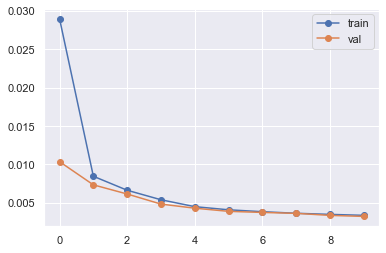

In [18]:

# Prepare loss history
hist_loss = np.zeros(EPOCHS)
hist_loss_val = np.zeros(EPOCHS)
for idx_epoch in range(EPOCHS):
    running_loss = 0
    with tqdm(total=len(dataloader_train.dataset), desc=f"[Epoch {idx_epoch+1:3d}/{EPOCHS}]") as pbar:
        for idx_batch, (x, y) in enumerate(dataloader_train):
            optimizer.zero_grad()

            # Propagate input
            netout = net(x.to(device))

            # Comupte loss
            loss = loss_function(y.to(device), netout)

            # Backpropage loss
            loss.backward()

            # Update weights
            optimizer.step()

            running_loss += loss.item()
            pbar.set_postfix({'loss': running_loss/(idx_batch+1)})
            pbar.update(x.shape[0])
        
        train_loss = running_loss/len(dataloader_train)
        val_loss = compute_loss(net, dataloader_val, loss_function, device).item()
        pbar.set_postfix({'loss': train_loss, 'val_loss': val_loss})
        
        hist_loss[idx_epoch] = train_loss
        hist_loss_val[idx_epoch] = val_loss
        
plt.plot(hist_loss, 'o-', label='train')
plt.plot(hist_loss_val, 'o-', label='val')
_ = plt.legend()



In [19]:
_ = net.eval()

In [7]:
# plot_visual_sample(dataloader_test, net, device)
# plt.savefig("fig")

In [8]:
predictions = np.empty(shape=(len(dataloader_test.dataset), 672, 8))

idx_prediction = 0
with torch.no_grad():
    for x, y in tqdm(dataloader_test, total=len(dataloader_test)):
        netout = net(x.to(device)).cpu().numpy()
        predictions[idx_prediction:idx_prediction+x.shape[0]] = netout
        idx_prediction += x.shape[0]

100%|██████████| 250/250 [00:15<00:00, 16.22it/s]


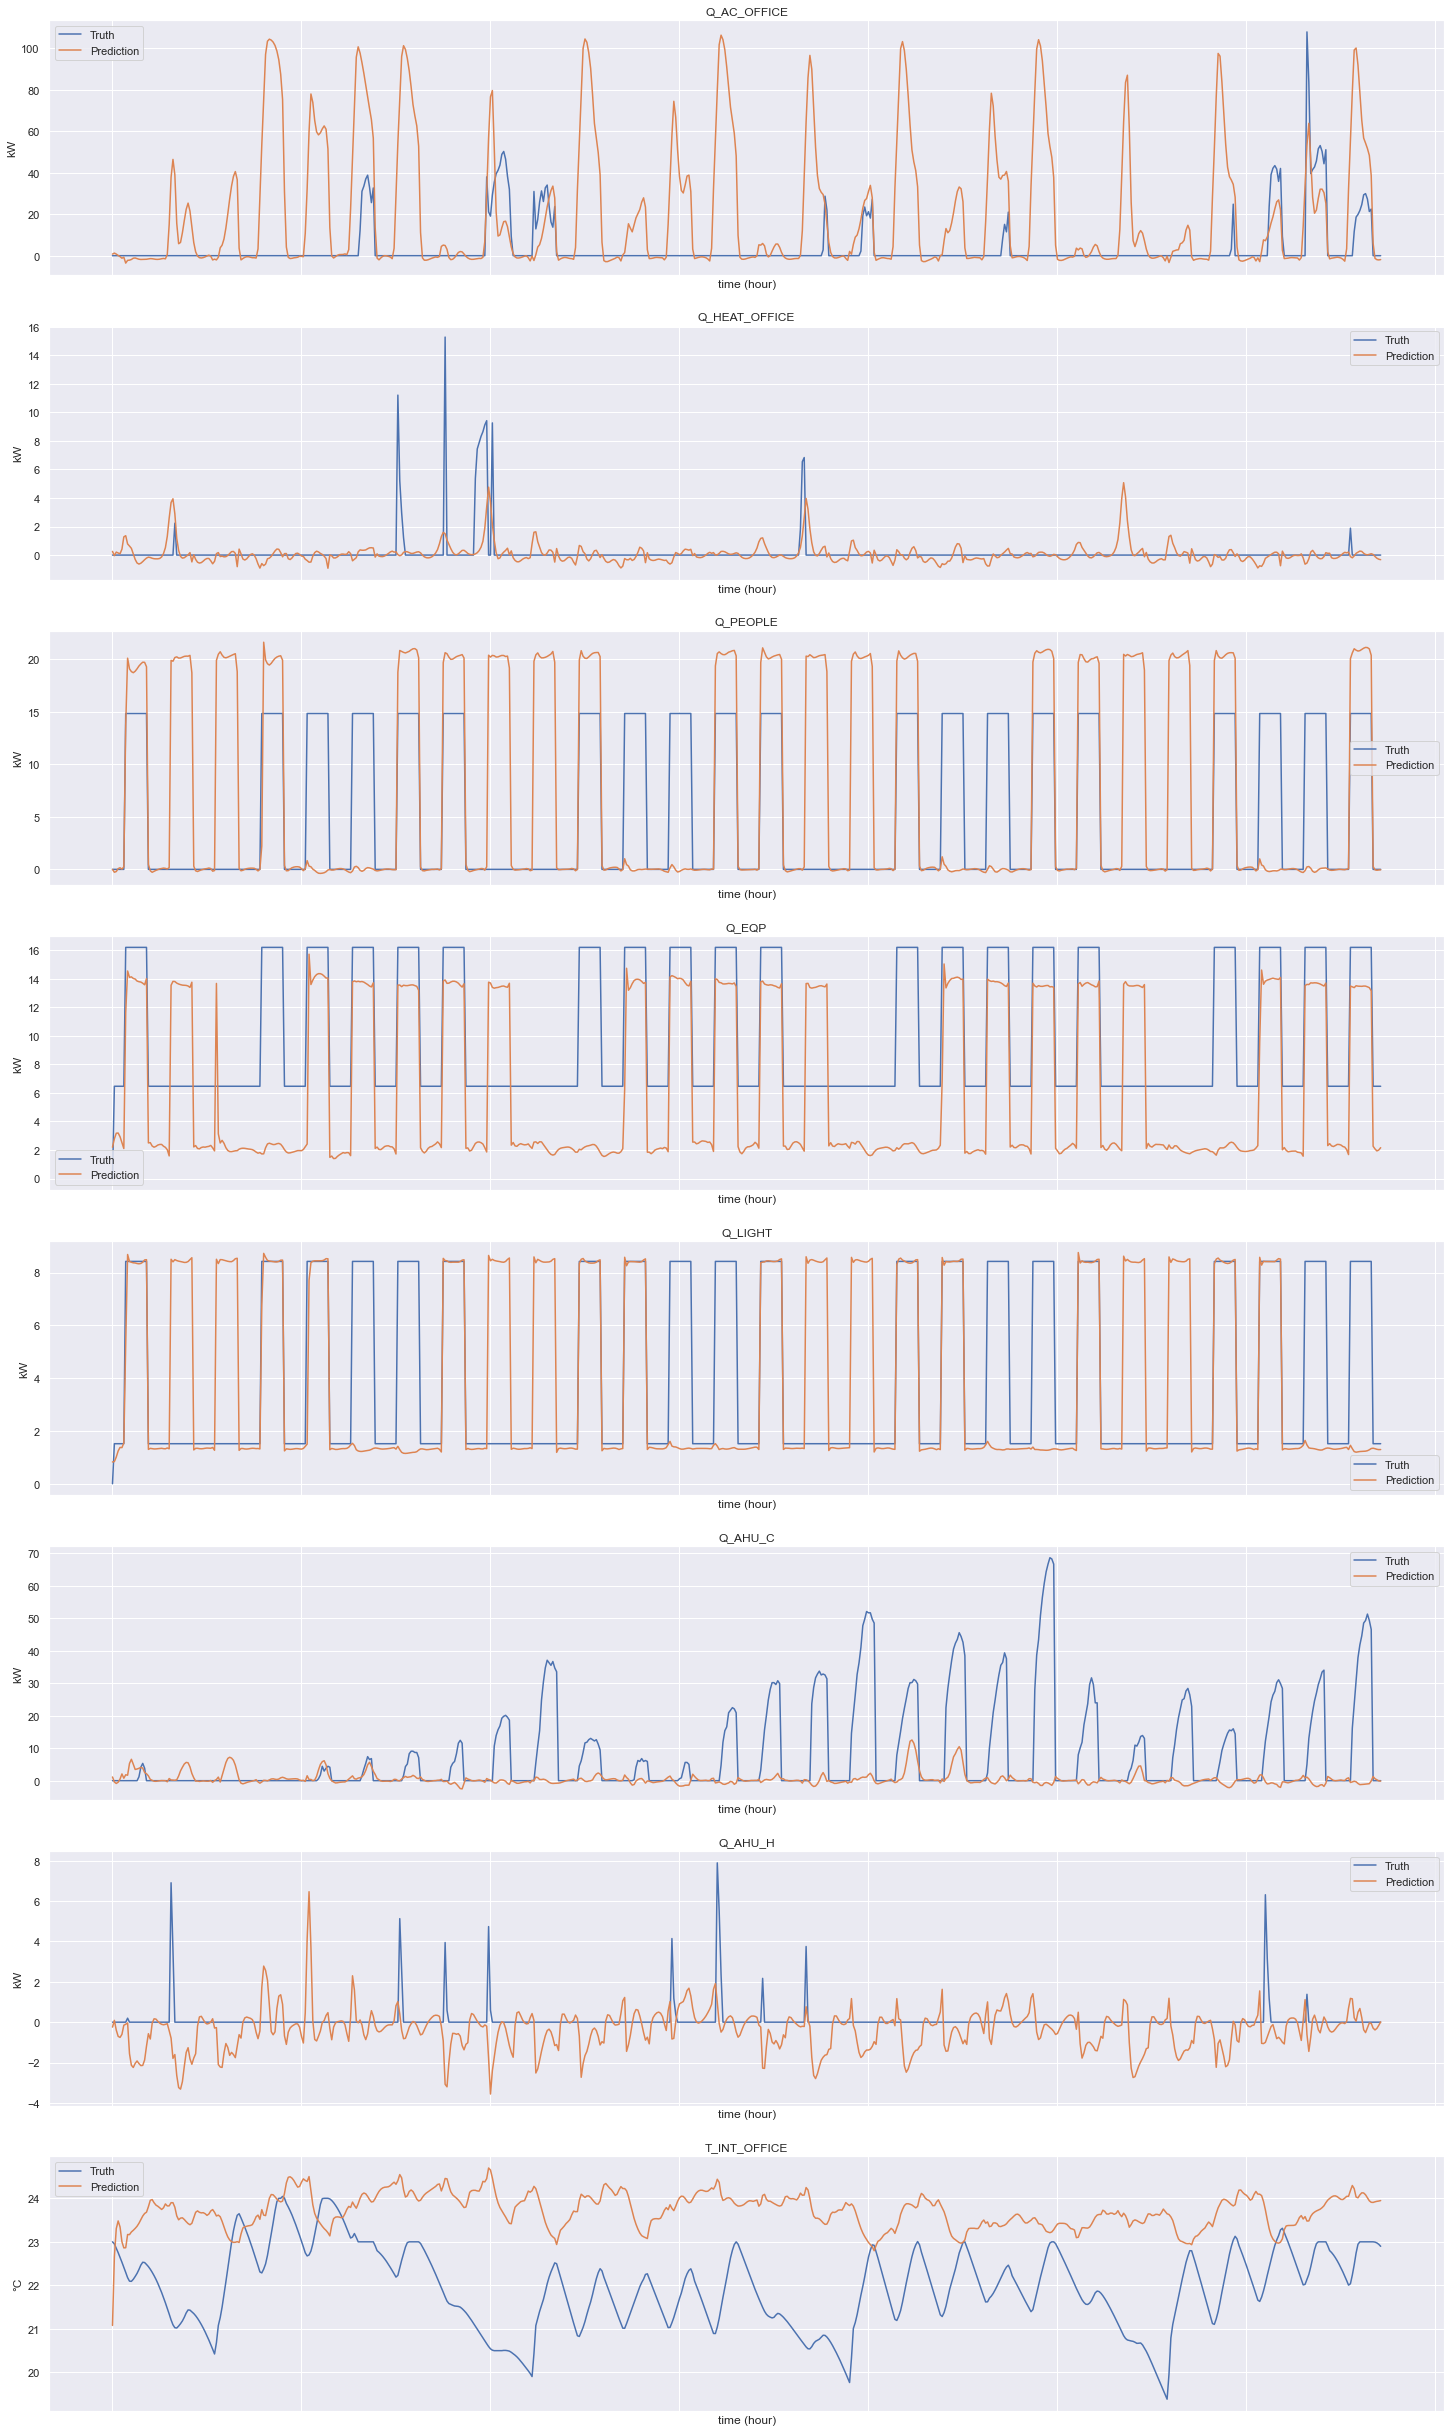

In [9]:
map_plot_function(ozeDataset, predictions, plot_visual_sample, dataset_indices=dataloader_test.dataset.indices)